<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/0608_more_a_the_classic_romania_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
base = "https://raw.githubusercontent.com/mahdihassanzade/Romanian-problem-using-Astar-and-GBFS/main/"
cities_url = f"{base}cities.txt"
heuristics_url = f"{base}heuristics.txt"
edges_url = f"{base}citiesGraph.txt"

In [4]:
cities = pd.read_csv(cities_url, delim_whitespace=True,
                     header=None, names=["city", "x", "y"])
cities.head()

,city,x,y
0,Arad,29,192
1,Bucharest,268,55
2,Craiova,163,22
3,Dobreta,91,32
4,Eforie,420,28


In [5]:
heuristics = pd.read_csv(heuristics_url, delim_whitespace=True,
                         header=None, names=["city", "h"])
heuristics.head()

,city,h
0,Arad,366
1,Bucharest,0
2,Craiova,160
3,Dobreta,242
4,Eforie,161


In [6]:
edges = pd.read_csv(edges_url, delim_whitespace=True,
                    header=None, names=["from", "to", "w"])
edges.head()

,from,to,w
0,Arad,Sibiu,140
1,Arad,Timisoara,118
2,Arad,Zerind,75
3,Bucharest,Fagaras,211
4,Bucharest,Giurgiu,90


In [56]:
labels = [x for x in cities["city"]]
n2i = {city: i for i, city in enumerate(labels)}
h = [row[1]["h"] for row in heuristics.iterrows()]

In [68]:
G = [[] for _ in range(len(labels))]
for row in edges.iterrows():
    u = n2i[row[1]["from"]]
    v = n2i[row[1]["to"]]
    w = int(row[1]["w"])
    G[u].append((v, w))
    G[v].append((u, w))
for u in G:
    print(u)

[(15, 140), (16, 118), (19, 75)]
[(5, 211), (6, 90), (13, 101), (17, 85)]
[(3, 120), (13, 138), (14, 146)]
[(2, 120), (10, 75)]
[(7, 86)]
[(1, 211), (15, 99)]
[(1, 90)]
[(4, 86), (17, 98)]
[(11, 87), (18, 92)]
[(10, 70), (16, 111)]
[(3, 75), (9, 70)]
[(8, 87)]
[(19, 71), (15, 151)]
[(1, 101), (2, 138), (14, 97)]
[(2, 146), (13, 97), (15, 80)]
[(0, 140), (5, 99), (12, 151), (14, 80)]
[(0, 118), (9, 111)]
[(1, 85), (7, 98), (18, 142)]
[(8, 92), (17, 142)]
[(0, 75), (12, 71)]


In [79]:
import graphviz as gv

def drawG_al(G, cities=cities, h=h, path=[]):
  graph = gv.Graph("romania")
  graph.graph_attr["layout"] = "neato"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  u = 0
  for row in cities.iterrows():
      label = row[1]["city"]
      x = row[1]["x"] 
      y = row[1]["y"]
      graph.node(str(u), label=f"{label}\nh={h[u]}", pos=f"{x/30},{y/30}!")
      u += 1
  for v, u in enumerate(path):
    if u != -1:
      for vi, w in G[u]:
        if vi == v:
          break
      graph.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v, w in G[u]:
      draw = False
      if not f"{u},{v}" in added:
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      if draw:
        graph.edge(str(u), str(v), str(w))
  #print(graph)
  return graph

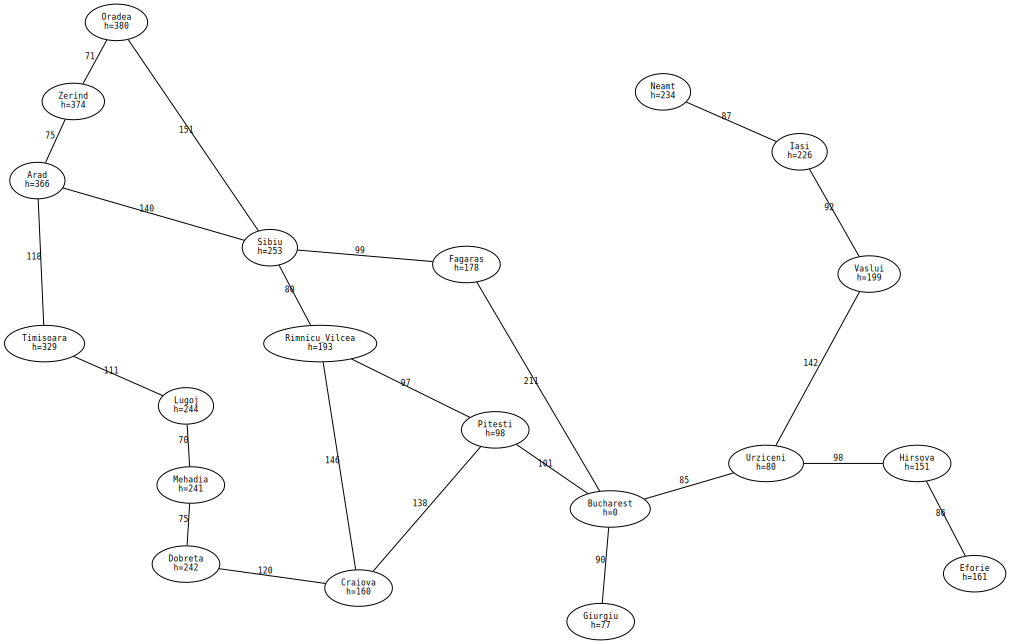

In [70]:
drawG_al(G)

In [82]:
import heapq
import math
#import pdb

def a_star(G, s, t, h):
    n = len(G)
    visited = [False]*n
    path = [-1]*n
    g = [math.inf]*n
    q = []
    g[s] = 0
    heapq.heappush(q, (h[s], s))
    #pdb.set_trace()
    while q:
        _, u = heapq.heappop(q)
        if u == t:
            break
        if not visited[u]:
            visited[u] = True
            for v, w in G[u]:
                if visited[v]: continue
                if g[u] + w < g[v]:
                    g[v] = g[u] + w
                    path[v] = u
                    f = g[v] + h[v]
                    heapq.heappush(q, (f, v))
    return path
    

[-1, 13, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, 2, -1, -1, -1, -1, -1]


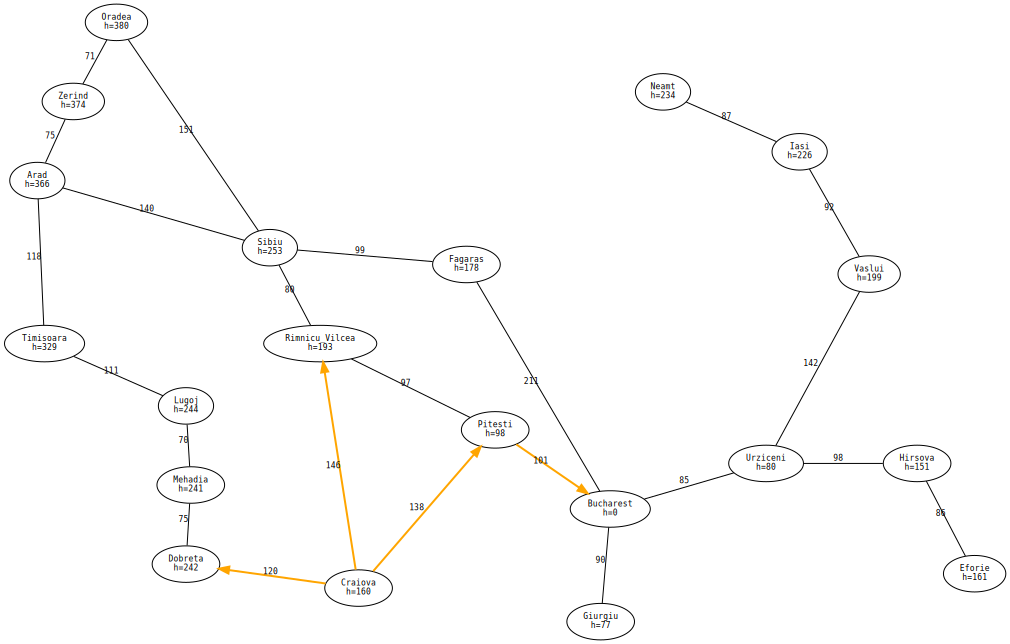

In [83]:
path = a_star(G, n2i["Craiova"], n2i["Bucharest"], h)
print(path)
drawG_al(G, path=path, h=h)

In [84]:
import heapq
import math

def dijkstra(G, s, t):
    n = len(G)
    visited = [False]*n
    path = [-1]*n
    g = [math.inf]*n
    q = []
    g[s] = 0
    heapq.heappush(q, (0, s))
    #pdb.set_trace()
    while q:
        _, u = heapq.heappop(q)
        if u == t:
            break
        if not visited[u]:
            visited[u] = True
            for v, w in G[u]:
                if visited[v]: continue
                if g[u] + w < g[v]:
                    g[v] = g[u] + w
                    path[v] = u
                    heapq.heappush(q, (g[v], v))
    return path, g
    

[15, 13, -1, 2, -1, 15, -1, -1, -1, 10, 3, -1, 15, 2, 2, 14, -1, -1, -1, -1]


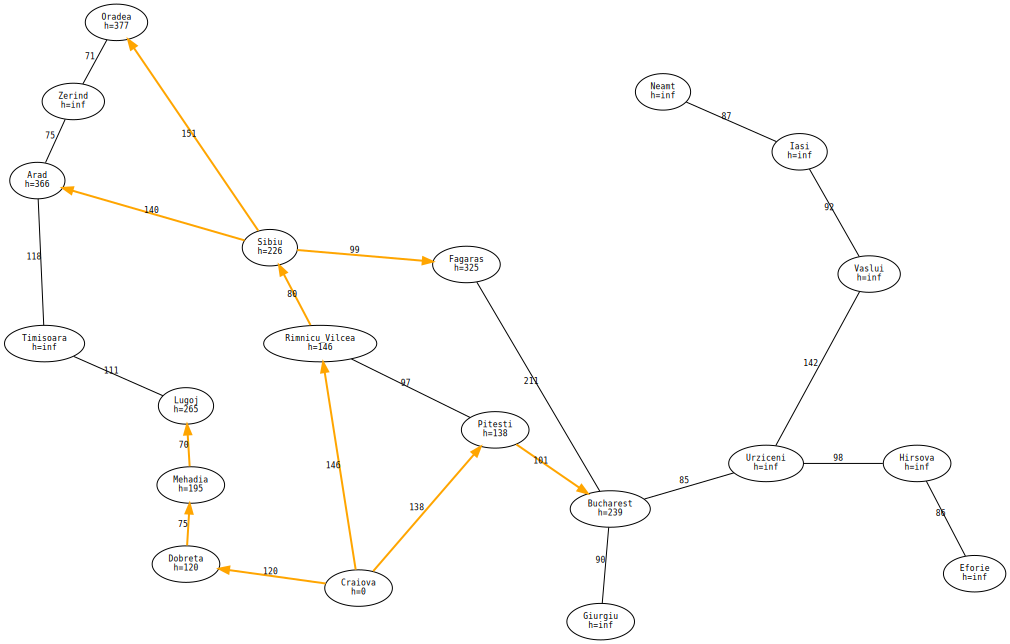

In [85]:
path, g = dijkstra(G, n2i["Craiova"], n2i["Bucharest"])
print(path)
drawG_al(G, path=path, h=g)